In [7]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16675 sha256=1b90f904816c2dd6ca7e016d6d931a7d9e014b798ae0fba562bb1ab7bb65ddc4
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [4]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'epirecipes:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F588%2F1569%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240830%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240830T022816Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D19789a212a5278e4abd5dc29958f0e23cdf5305458689cdd33fbb5708960edca0956ebbe2f1d80cb3baa2017d26199727bb2a202302916c46d1f90835199c808f45c235f8a8086c9d871f5003c841101431b2ce85d22975133a9742dedaee8e5b4acb56641dc047b66c078b8b3ec248d0441b71f04426f0297b1dadf046cf761cb339582526ad685350738f3cc87015d4fade60e78a1c63e38fd4bd81aad34374c63206add8c577f6a1cd0ed2bb46cdb463f745c7c8aba58359530d2438deb85ee4698974ccb84fd8ebc776caf90b455a45259a3ebfb1f29a70c326b5343b8ad5d6426b905e7e4d34854d9000cc4262b57db685569bf0a31df2d89f2676c09f7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 11830041 bytes downloaded
Downloaded and uncompressed: epirecipes
Data source import complete.


<h2 style="text-align:center;font-size:200%;">
    <b>Healthy Recipe Recommendation</b>
</h2>
<h3  style="text-align:center;">Keywords :
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Health</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Food</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Recommendation</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Optimization</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">PuLP</span>
</h3>

<hr>

<h2 style="font-size:150%;"><span id='top'>Table of Contents</span></h2>
<blockquote>
    <ol>
        <li><a href="#Overview">Overview</a></li>
        <ul>
            <li><a href="#About-the-Dataset">About the Dataset</a></li>
            <li><a href="#What-You-Get-from-this-Notebook">What You Get from this Notebook</a></li>
        </ul>
        <li><a href="#Preparation">Preparation</a></li>
        <li><a href="#Data-Load">Data Load</a></li>
        <li><a href="#Pre-Processing">Pre-Processing</a></li>
        <ul>
            <li><a href="#Delete-Null-Rows-in-Certain-Columns">Delete Null Rows in Certain Columns</a></li>
            <li><a href="#Extract-Certain-Columns">Extract Certain Columns</a></li>
            <li><a href="#Add-Recipe-Information">Add Recipe Information</a></li>
        </ul>
        <li><a href="#EDA">EDA</a></li>
        <ul>
            <li><a href="#Basic-Information">Basic Information</a></li>
            <li><a href="#Rating">Rating</a></li>
            <li><a href="#Nutrients">Nutrients</a></li>
            <li><a href="#Flags">Flags</a></li>
            <li><a href="#Other-Information">Other Information</a></li>
        </ul>
        <li><a href="#Recommendation">Recommendation</a></li>
        <ul>
            <li><a href="#Recommendation-Function">Recommendation Function</a></li>
            <li><a href="#Nutrients-Condition">Nutrients Condition</a></li>
            <ul>
                <li><a href="#Male">Male</a></li>
                <li><a href="#Female">Female</a></li>
            </ul>
            <li><a href="#Recipes-for-YOU">Recipes for YOU</a></li>
            <ul>
                <li><a href="#Adult-Male">Adult Male</a></li>
                <li><a href="#Adult-Female">Adult Female</a></li>
                <li><a href="#Man-in-Summer">Man in Summer</a></li>
                <li><a href="#Man-in-Winter">Man in Winter</a></li>
                <li><a href="#Man-at-Breakfast">Man at Breakfast</a></li>
                <li><a href="#Man-with-Low-Calory">Man with Low Calory</a></li>
                <li><a href="#Man-in-Busy-Day">Man in Busy Day</a></li>
            </ul>
        </ul>
        <li><a href="#References">References</a></li>
    </ol>
</blockquote>

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# Overview
## About the Dataset
- 20k recipes listed by recipe **rating**, nutritional information and assigned categories
- Recipes extracted from [Epicurious ](http://www.epicurious.com/recipes-menus)
- Kaggle Dataset Page : [Epicurious - Recipes with Rating and Nutrition](https://www.kaggle.com/datasets/hugodarwood/epirecipes)

## What You Get from this Notebook
- EDA & Visualization
- Mathematical Optimization
    - Python Optimization Library : [PuLP](https://coin-or.github.io/pulp/)
    - In this notebook, I applied **mathematical optimazation** to **food recommendation**
- Food Recommendation
    - [Recommendation of healthy food](#Recommendation-Function) tailored to the each person's health status
    - Foods were recommended based on [official standard nutritions value](#Nutrients-Condition) (Japan)
    - Optimal foods for some situations
        - Seasons ([Summer](#Man-in-Summer), [Winter](Man-in-Winter))
        - Mealtime ([Breakfast](#Man-at-Breakfast), Dinner)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# Preparation

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
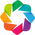

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
/kaggle/input/epirecipes/recipe.py
/kaggle/input/epirecipes/utils.py
/kaggle/input/epirecipes/epi_r.csv
/kaggle/input/epirecipes/full_format_recipes.json


In [8]:
import numpy as np
import pandas as pd
import os
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
import json
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
import pulp as pl
import warnings
warnings.simplefilter(action='ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# Data Load

In [9]:
df = pd.read_csv("/kaggle/input/epirecipes/epi_r.csv")
df.head(3)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(20052, 680)

In [ ]:
for i,j in enumerate(df.columns):
    print(f"{i} : {j}")

0 : title
1 : rating
2 : calories
3 : protein
4 : fat
5 : sodium
6 : #cakeweek
7 : #wasteless
8 : 22-minute meals
9 : 3-ingredient recipes
10 : 30 days of groceries
11 : advance prep required
12 : alabama
13 : alaska
14 : alcoholic
15 : almond
16 : amaretto
17 : anchovy
18 : anise
19 : anniversary
20 : anthony bourdain
21 : aperitif
22 : appetizer
23 : apple
24 : apple juice
25 : apricot
26 : arizona
27 : artichoke
28 : arugula
29 : asian pear
30 : asparagus
31 : aspen
32 : atlanta
33 : australia
34 : avocado
35 : back to school
36 : backyard bbq
37 : bacon
38 : bake
39 : banana
40 : barley
41 : basil
42 : bass
43 : bastille day
44 : bean
45 : beef
46 : beef rib
47 : beef shank
48 : beef tenderloin
49 : beer
50 : beet
51 : bell pepper
52 : berry
53 : beverly hills
54 : birthday
55 : biscuit
56 : bitters
57 : blackberry
58 : blender
59 : blue cheese
60 : blueberry
61 : boil
62 : bok choy
63 : bon appétit
64 : bon app��tit
65 : boston
66 : bourbon
67 : braise
68 : bran
69 : brandy
70 : b

In [ ]:
with open("/kaggle/input/epirecipes/full_format_recipes.json","r") as f:
    full_recipe = json.load(f)

In [ ]:
len(full_recipe)

20130

In [ ]:
print(json.dumps(full_recipe[0:2], indent=2))

[
  {
    "directions": [
      "1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool.",
      "2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper.",
      "3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you."
    ],
    "fat": 7.0,
    "date": "2006-09-01T04:00:00.000Z",
    "categories": [
      "Sandwich",

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# Pre-Processing

## Delete Null Rows in Certain Columns

In [ ]:
df[["title","rating","calories","protein","fat","sodium"]].head(3)

,title,rating,calories,protein,fat,sodium
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0


In [ ]:
df_p1 = df[df[["title","rating","calories","protein","fat","sodium"]].isnull().any(axis=1)==False].reset_index(drop=True)
df_p1.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_p1.shape

(15864, 680)

## Extract Certain Columns

In [ ]:
_certain_cols = ["title","rating","calories","protein","fat","sodium","22-minute meals","advance prep required","alcoholic","bread","breakfast","dinner","drink","drinks",\
                 "egg","fall","fat free","healthy","high fiber","low cal","low carb","low cholesterol","low fat","low sodium","low sugar","low/no sugar","lunch",\
                "meat","quick & easy","quick and healthy","rice","spring","summer","vegetable","winter"]

In [ ]:
df_p2 = df_p1[_certain_cols]

## Add Recipe Information

In [ ]:
full_recipe[0]

{'directions': ['1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool.',
  '2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper.',
  '3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.'],
 'fat': 7.0,
 'date': '2006-09-01T04:00:00.000Z',
 'categories': ['Sandwich',
  'Bean',
  'Fruit',
  'Tomato',
  'turkey',

In [ ]:
def get_recipe_info(recipe_title):
    recipe_dic = [i for i in full_recipe if "title" in i.keys() and i["title"]==recipe_title]
    if len(recipe_dic) == 0:
        return pd.Series({"len_directions":None, "len_ingredients":None})
    else:
        recipe_dic = recipe_dic[0]
    len_directions = len(recipe_dic["directions"])
    len_ingredients = len(recipe_dic["ingredients"])
    return pd.Series({"len_directions":len_directions, "len_ingredients":len_ingredients})

In [ ]:
df_p2[["len_directions","len_ingredients"]] = df_p2.title.parallel_apply(lambda x : get_recipe_info(x))

In [ ]:
df_p2.head(3)

,title,rating,calories,protein,fat,sodium,22-minute meals,advance prep required,alcoholic,bread,...,meat,quick & easy,quick and healthy,rice,spring,summer,vegetable,winter,len_directions,len_ingredients
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,15.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,28.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,6.0


<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# EDA

## Basic Information

Number of Recipes

In [ ]:
len(df_p2.title.unique())

14058

Columns

In [ ]:
list(df_p2.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '22-minute meals',
 'advance prep required',
 'alcoholic',
 'bread',
 'breakfast',
 'dinner',
 'drink',
 'drinks',
 'egg',
 'fall',
 'fat free',
 'healthy',
 'high fiber',
 'low cal',
 'low carb',
 'low cholesterol',
 'low fat',
 'low sodium',
 'low sugar',
 'low/no sugar',
 'lunch',
 'meat',
 'quick & easy',
 'quick and healthy',
 'rice',
 'spring',
 'summer',
 'vegetable',
 'winter',
 'len_directions',
 'len_ingredients']

## Rating

average rating

In [ ]:
df_p2.rating.mean()

3.76095247100353

In [ ]:
hv.Distribution(df_p2.rating).opts(opts.Distribution(title="Distribution of Rating",tools=['hover'],show_grid=True)) + \
hv.BoxWhisker(df_p2.rating).opts(opts.BoxWhisker(title="Rating BoxPlot",tools=['hover'],show_grid=True))

:Layout
   .Distribution.I :Distribution   [rating]   (Density)
   .BoxWhisker.I   :BoxWhisker   (y)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Nutrients

average nutrients

In [ ]:
df_p2[["calories","protein","fat","sodium"]].mean()

calories    6350.682993
protein      100.324571
fat          346.986826
sodium      6252.742310
dtype: float64

In [ ]:
g1 = hv.BoxWhisker(df_p2.calories).opts(opts.BoxWhisker(title="calories"))
g2 = hv.BoxWhisker(df_p2.protein).opts(opts.BoxWhisker(title="protein"))
g3 = hv.BoxWhisker(df_p2.fat).opts(opts.BoxWhisker(title="fat"))
g4 = hv.BoxWhisker(df_p2.sodium).opts(opts.BoxWhisker(title="sodium"))

(g1+g2+g3+g4).opts(opts.BoxWhisker(width=300, ylabel="value",tools=['hover'],show_grid=True)).opts(shared_axes=False).cols(2)

:Layout
   .BoxWhisker.I   :BoxWhisker   (y)
   .BoxWhisker.II  :BoxWhisker   (y)
   .BoxWhisker.III :BoxWhisker   (y)
   .BoxWhisker.IV  :BoxWhisker   (y)

## Flags

In [ ]:
tmp = df_p2.drop(["title","rating","calories","protein","fat","sodium","len_directions","len_ingredients"], axis=1)
p = pd.DataFrame()
for c in tmp.columns:
    _tmp = tmp[c].value_counts(normalize=True) * 100
    p = pd.concat([p,_tmp], axis=1)
t = pd.melt(p.reset_index(), ['index'])

g1 = hv.Bars(t.query("variable in ['bread','rice','meat','egg','drink','drinks','alcoholic','vegetable']"), ['variable','index'], 'value').opts(title='Ingredients')
g2 = hv.Bars(t.query("variable in ['spring','summer','fall','winter']"), ['variable','index'], 'value').opts(title='Season')
g3 = hv.Bars(t.query("variable in ['breakfast','lunch','dinner']"), ['variable','index'], 'value').opts(title='Eat Timing')
g4 = hv.Bars(t.query("variable in ['22-minute meals','advance prep required','quick & easy','quick and healthy']"), ['variable','index'], 'value')\
    .opts(title='Cooking Categories')
g5 = hv.Bars(t.query("variable in ['healthy','fat free','high fiber','low cal','low carb','low cholesterol','low fat','low sodium','low sugar','low/no sugar']"), \
             ['variable','index'], 'value').opts(title='Recipe Categories')

(g1+g2+g3+g4+g5)\
    .opts(opts.Bars(width=250, height=400,invert_axes=True,stacked=True,legend_position='bottom',tools=['hover'],show_grid=True,xlabel="",ylabel="",fontsize={'title':10}))\
    .opts(shared_axes=False).cols(3)

:Layout
   .Bars.I   :Bars   [variable,index]   (value)
   .Bars.II  :Bars   [variable,index]   (value)
   .Bars.III :Bars   [variable,index]   (value)
   .Bars.IV  :Bars   [variable,index]   (value)
   .Bars.V   :Bars   [variable,index]   (value)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Other Information

In [ ]:
df_p2[["len_directions","len_ingredients"]].mean()

,0
len_directions,3.497919
len_ingredients,10.041362


In [ ]:
g1 = hv.BoxWhisker(df_p2.len_directions).opts(opts.BoxWhisker(title="directions"))
g2 = hv.BoxWhisker(df_p2.len_ingredients).opts(opts.BoxWhisker(title="ingredients"))

(g1+g2).opts(opts.BoxWhisker(width=300, ylabel="value",tools=['hover'],show_grid=True)).opts(shared_axes=False).cols(2)

:Layout
   .BoxWhisker.I  :BoxWhisker   (y)
   .BoxWhisker.II :BoxWhisker   (y)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# Recommendation

## Recommendation Function

In [ ]:
def recipe_recommend(df, number_of_dishes, number_of_candidates, nut_conf):
    tmp = df.copy()
    candidates_list = []

    # create recommend-list {number_of_candidates} times
    for i in range(0,number_of_candidates):
        m = pl.LpProblem(sense=pl.LpMaximize)
        tmp.loc[:,'v'] = [pl.LpVariable('x%d'%i, cat=pl.LpBinary) for i in range(len(tmp))]

        # maximize rating
        m += pl.lpDot(tmp["rating"], tmp["v"])

        # limit the number of recipes
        m += pl.lpSum(tmp["v"]) <= number_of_dishes

        # limit the calories
        m += pl.lpDot(tmp["calories"], tmp["v"]) >= nut_conf["cal_lo"]
        m += pl.lpDot(tmp["calories"], tmp["v"]) <= nut_conf["cal_up"]

        # limit the protein
        m += pl.lpDot(tmp["protein"], tmp["v"]) >= nut_conf["pro_lo"]
        m += pl.lpDot(tmp["protein"], tmp["v"]) <= nut_conf["pro_up"]

        # limit the fat (sum of fat / calories)
        m += pl.lpDot(tmp["fat"], tmp["v"]) >= nut_conf["fat_lo"]
        m += pl.lpDot(tmp["fat"], tmp["v"]) <= nut_conf["fat_up"]

        # limit the sodium
        m += pl.lpDot(tmp["sodium"], tmp["v"]) >= nut_conf["sod_lo"]
        m += pl.lpDot(tmp["sodium"], tmp["v"]) <= nut_conf["sod_up"]

        m.solve(pl.PULP_CBC_CMD(msg=0, options=['maxsol 1']))

        if m.status == 1:
            tmp.loc[:,'val'] = tmp["v"].apply(lambda x: pl.value(x))
            ret = tmp.query('val==1')["title"].values
            candidates_list.append(ret)
            # update dataframe (remove recommended title )
            tmp = tmp.query('val==0')

    return candidates_list

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Nutrients Condition
consider upper/lower nutrients for male / female  
https://www.otsuka.co.jp/cmt/nutrition/1day/

### Male

In [ ]:
# Daily
male_japanese_day = {
    "cal_up" : 2700,
    "cal_lo" : 2600,
    "pro_up" : 65,
    "pro_lo" : 60,
    "fat_up" : 30,
    "fat_lo" : 20,
    "sod_up" : 7500,
    "sod_lo" : 7000
}
# Daily => 3 x meals
## 1 meal => Daily / 3
male_japanese_each = { k:v/3 for k, v in male_japanese_day.items() }

print("### Nutrients Conditions ###")
print(f"{np.round(male_japanese_each['cal_lo'],1)} =< calory <= {np.round(male_japanese_each['cal_up'],1)}")
print(f"{np.round(male_japanese_each['pro_lo'],1)} =< protain <= {np.round(male_japanese_each['pro_up'],1)}")
print(f"{np.round(male_japanese_each['fat_lo'],1)} =< fat <= {np.round(male_japanese_each['fat_up'],1)}")
print(f"{np.round(male_japanese_each['sod_lo'],1)} =< sodium <= {np.round(male_japanese_each['sod_up'],1)}")

### Nutrients Conditions ###
866.7 =< calory <= 900.0
20.0 =< protain <= 21.7
6.7 =< fat <= 10.0
2333.3 =< sodium <= 2500.0


### Female

In [ ]:
# Daily
female_japanese_day = {
    "cal_up" : 2000,
    "cal_lo" : 1950,
    "pro_up" : 50,
    "pro_lo" : 45,
    "fat_up" : 30,
    "fat_lo" : 20,
    "sod_up" : 7500,
    "sod_lo" : 7000
}
# Daily => 3 x meals
## 1 meal => Daily / 3
female_japanese_each = { k:v/3 for k, v in female_japanese_day.items() }

print("### Nutrients Conditions ###")
print(f"{np.round(female_japanese_each['cal_lo'],1)} =< calory <= {np.round(female_japanese_each['cal_up'],1)}")
print(f"{np.round(female_japanese_each['pro_lo'],1)} =< protain <= {np.round(female_japanese_each['pro_up'],1)}")
print(f"{np.round(female_japanese_each['fat_lo'],1)} =< fat <= {np.round(female_japanese_each['fat_up'],1)}")
print(f"{np.round(female_japanese_each['sod_lo'],1)} =< sodium <= {np.round(female_japanese_each['sod_up'],1)}")

### Nutrients Conditions ###
650.0 =< calory <= 666.7
15.0 =< protain <= 16.7
6.7 =< fat <= 10.0
2333.3 =< sodium <= 2500.0


<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Recipes for YOU

### Adult Male

In [ ]:
male_recipes = recipe_recommend(df_p2, 3, 5, male_japanese_each)
for i, j in enumerate(male_recipes):
    print(f"{i} : " + " + ".join(j))

0 : Asian Barbecue Sauce  + Yam and Black Bean Burritos with Amaranth  + Mango and Red Onion Salsa 
1 : Cherry Cola Barbecue Sauce  + Cucumber Soup with Wasabi-Avocado Cream  + Self-Stomped Thick White Noodles 
2 : Smoked Fish Chowder  + Homemade Montreal Steak Seasoning  + Fish House Punch 
3 : Salted Brown Butter Cookies  + Steamed Jasmine Rice  + Homemade Turkey Stock 
4 : Honeyed-Mango Chutney Sauce  + Khao Plow  + Coffee and Molasses Cured Duck Breast Bacon 


<b>0 : Asian Barbecue Sauce  + Yam and Black Bean Burritos with Amaranth  + Mango and Red Onion Salsa </b>
<table>
    <tr>
        <td>
            <img src="https://assets.epicurious.com/photos/57c5b0b9354f42d45822eacd/16:9/w_1280,c_limit/asian-barbecue-sauce.jpg" width="300">
            <figcaption>Asian Barbecue Sauce</figcaption>
        </td>
        <td>
            <img src="https://togetherwomenrise.org/wp-content/uploads/2015/12/RECIPE-0116-Burrito.jpg" width="300">
            <figcaption>Yam and Black Bean Burritos with Amaranth</figcaption>
        </td>
        <td>
            <img src="https://cookieandkate.com/images/2015/04/fresh-mango-salsa-recipe-1.jpg" width="300">
            <figcaption>Mango and Red Onion Salsa</figcaption>
        </td>
    </tr>
</table>

### Adult Female

In [ ]:
female_recipes = recipe_recommend(df_p2, 2, 2, female_japanese_each)
for i, j in enumerate(female_recipes):
    print(f"{i} : " + " + ".join(j))

0 : Cherries Simmered in Red Wine  + Smoky Greens and Beans 
1 : Orange Rice Pudding  + Curried Stir-Fried Noodles with Vegetables 


<b>0 : Yemeni Spice Rub  + Berry-Yogurt Smoothie  + Plum Freezer Jam With Cardamom and Ginger </b>
<table>
    <tr>
        <td>
            <img src="https://assets.epicurious.com/photos/5b2a903acd6f065408f725a9/4:3/w_779,h_584,c_limit/yemeni-spice-rub-recipe-062018.jpg" width="300">
            <figcaption>Yemeni Spice Rub</figcaption>
        </td>
        <td>
            <img src="https://simple-veganista.com/wp-content/uploads/2017/07/mixed-berry-yogurt-smoothie-2.jpg" width="300">
            <figcaption>Berry-Yogurt Smoothie</figcaption>
        </td>
        <td>
            <img src="https://assets.epicurious.com/photos/55f72d1ee7f5be0c7ccb6e91/5:4/w_3140,h_2512,c_limit/EP_09112015_jam_recipeimage.jpg" width="300">
            <figcaption>Plum Freezer Jam With Cardamom and Ginger</figcaption>
        </td>
    </tr>
</table>

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

### Man in Summer

In [ ]:
male_recipes = recipe_recommend(df_p2.query("summer==1"), 3, 5, male_japanese_each)
for i, j in enumerate(male_recipes):
    print(f"{i} : " + " + ".join(j))

0 : Asian Barbecue Sauce  + Plum and Berry Summer Puddings  + Mixed Vegetable Relish 
1 : Berry-Yogurt Smoothie  + Molasses Barbecue Sauce  + Shaker Pickles 
2 : Plain Hamburgers  + Rum Punch with Passion Fruit and Lime  + Soy-Lime Dipping Sauce 
3 : Mango-Lime Ice  + Couscous-Stuffed Tomatoes with Currants and Herbs  + Coffee and Molasses Cured Duck Breast Bacon 
4 : Sweet and Tangy Peach Relish  + Mango Shrimp Summer Rolls  + Roast Beef Sandwiches with Whole Grain Mustard and Cranberries 


<b>2 : Plain Hamburgers  + Rum Punch with Passion Fruit and Lime  + Soy-Lime Dipping Sauce </b>
<table>
    <tr>
        <td>
            <img src="https://media.istockphoto.com/photos/plain-hamburger-picture-id155352091?k=20&m=155352091&s=612x612&w=0&h=DO2yEZWHr2Aik5IHgqKX7EZebgZctamoMG0Adw7LbwM=" width="300">
            <figcaption>Plain Hamburgers</figcaption>
        </td>
        <td>
            <img src="https://www.livinglocurto.com/wp-content/uploads/2019/03/Tropical-Passion-Fruit-Rum-Punch-Cocktail-Recipe.jpg" width="300">
            <figcaption>Rum Punch with Passion Fruit and Lime</figcaption>
        </td>
        <td>
            <img src="https://ucarecdn.com/096e1cd5-a853-4cf8-9169-309cf591fa1e/-/scale_crop/1280x720/center/-/quality/normal/-/format/jpeg/soy-lime-sauce.jpg" width="300">
            <figcaption>Soy-Lime Dipping Sauce</figcaption>
        </td>
    </tr>
</table>

### Man in Winter

In [ ]:
male_recipes = recipe_recommend(df_p2.query("winter==1"), 3, 5, male_japanese_each)
for i, j in enumerate(male_recipes):
    print(f"{i} : " + " + ".join(j))

0 : Prunes in Wine and Armagnac  + White Bean, Pasta and Roasted Pepper Soup  + Mustard-Roasted Potatoes 
1 : Herbed Tomato Soup with Pasta  + Spiced Bananas  + Shrimp Bisque with Pernod 
2 : Crusty Mustard-Dill Meat Loaf  + Tangerine and Vanilla-Bean Marmalade  + Preserved Meyer Lemons 


<b>0 : Prunes in Wine and Armagnac  + White Bean, Pasta and Roasted Pepper Soup  + Mustard-Roasted Potatoes </b>
<table>
    <tr>
        <td>
            <img src="https://assets.marthastewart.com/styles/wmax-300/d16/prunes-mld107879/prunes-mld107879_vert.jpg?itok=1M1_dui0" width="300">
            <figcaption>Prunes in Wine and Armagnac</figcaption>
        </td>
        <td>
            <img src="https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F44%2F2021%2F10%2F22%2Fpasta-and-white-bean-soup.jpg&q=60" width="300">
            <figcaption>White Bean, Pasta and Roasted Pepper Soup</figcaption>
        </td>
        <td>
            <img src="https://food.fnr.sndimg.com/content/dam/images/food/fullset/2012/9/19/0/BX0705H_mustard-roasted-potatoes_s4x3.jpg.rend.hgtvcom.616.462.suffix/1371611490384.jpeg" width="300">
            <figcaption>Mustard-Roasted Potatoes</figcaption>
        </td>
    </tr>
</table>

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

### Man at Breakfast

In [ ]:
male_recipes = recipe_recommend(df_p2.query("breakfast==1"), 3, 5, male_japanese_each)
for i, j in enumerate(male_recipes):
    print(f"{i} : " + " + ".join(j))

0 : Cinnamon Oat Cakes  + Strawberry Jam  + Coffee and Molasses Cured Duck Breast Bacon 


<b>0 : Cinnamon Oat Cakes  + Strawberry Jam  + Coffee and Molasses Cured Duck Breast Bacon </b>
<table>
    <tr>
        <td>
            <img src="https://www.momendeavors.com/wp-content/uploads/2019/11/Cinnamon-Apple-Oatmeal-Cake.jpg" width="300">
            <figcaption>Cinnamon Oat Cakes</figcaption>
        </td>
        <td>
            <img src="https://thecozyapron.com/wp-content/uploads/2019/07/strawberry-jam_thecozyapron_1.jpg" width="300">
            <figcaption>Strawberry Jam</figcaption>
        </td>
        <td>
            <img src="https://i8.amplience.net/i/traeger/smoked-duck-breast-bacon_Traeger-Wood-Fired-Grills_RE_HE_M?w=1200&sm=aspect&aspect=2:1&scaleFit=poi&$poi2$" width="300">
            <figcaption>Coffee and Molasses Cured Duck Breast Bacon</figcaption>
        </td>
    </tr>
</table>

### Man with Low Calory

In [ ]:
male_recipes = recipe_recommend(df_p2[df_p2["low cal"]==1], 3, 5, male_japanese_each)
for i, j in enumerate(male_recipes):
    print(f"{i} : " + " + ".join(j))

<b>0 : Slightly Sweet Dill Refrigerator Pickles  + Homemade Chocolate Liqueur  + Shortcut Turkey Stock </b>
<table>
    <tr>
        <td>
            <img src="https://norrtable.com/wp-content/uploads/2021/10/IMG_9713_jpg-1-edited.jpg" width="300">
            <figcaption>Slightly Sweet Dill Refrigerator Pickles</figcaption>
        </td>
        <td>
            <img src="https://cookingwithmammac.com/wp-content/uploads/2019/12/Chocolate-Liqueur-Recipe-Pic.jpg" width="300">
            <figcaption>Homemade Chocolate Liqueur</figcaption>
        </td>
        <td>
            <img src="https://img.buzzfeed.com/buzzfeed-static/static/2013-09/enhanced/webdr05/26/16/enhanced-buzz-orig-14762-1380228460-30.jpg" width="300">
            <figcaption>Shortcut Turkey Stock</figcaption>
        </td>
    </tr>
</table>

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

### Man in Busy Day

In [ ]:
male_recipes = recipe_recommend(df_p2.query("len_ingredients <= 9 and len_directions <= 3"), 3, 5, male_japanese_each)
for i, j in enumerate(male_recipes):
    print(f"{i} : " + " + ".join(j))

<b>0 : Chicken Stock  + Steamed Jasmine Rice  + Purple Potato, Sugar Snap Pea, and Mint Salad </b>
<table>
    <tr>
        <td>
            <img src="https://www.spendwithpennies.com/wp-content/uploads/2017/12/How-to-Make-Chicken-Stock-21-500x500.jpg" width="300">
            <figcaption>Chicken Stock</figcaption>
        </td>
        <td>
            <img src="https://img.taste.com.au/LR2_4Z3C/taste/2016/11/lemon-grass-jasmine-rice-5935-1.jpeg" width="300">
            <figcaption>Steamed Jasmine Rice</figcaption>
        </td>
        <td>
            <img src="https://images.ctfassets.net/uw7yiu2kuigc/7kgTMc8itJFesVCACVj47S/d57072a72e6f8d4b0490274c55e15d74/Snap-Pea-and-Potato-Salad-with-Mint-and-Honey-Lead.jpg" width="300">
            <figcaption>Purple Potato, Sugar Snap Pea, and Mint Salad</figcaption>
        </td>
    </tr>
</table>

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# References
<blockquote>
    <ul>
        <li><a href="https://indrag49.github.io/Numerical-Optimization/">Introduction to Mathematical Optimization</a></li>
        <li><a href="https://coin-or.github.io/pulp/">PuLP Documentation</a></li>
        <li><a href="https://qiita.com/SaitoTsutomu/items/f8be15f56cbacdbb7bd9">献立を組合せ最適化で考える</a></li>
        <li><a href="https://qiita.com/ingk_124/items/55eb58500fb6f3a441aa">整数計画問題で健康的な献立を見つける</a></li>
        <li><a href="https://qiita.com/birdwatcher/items/d5c2a88c733ca71ae91e">PuLPで全ての解を出す</a></li>
        <li><a href="https://www.otsuka.co.jp/cmt/nutrition/1day/">Nutrients Conditions</a></li>
    </ul>
</blockquote>

In [ ]:
!pip freeze > requirements.txt

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>